In [1]:
# Import necesssary packages

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from keras.utils import to_categorical
from keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from keras import optimizers
from sklearn.metrics import confusion_matrix
import os, shutil

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
# load the data 

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
# display the size of data sets

x_train.shape
x_test.shape
y_train.shape
y_test.shape

(50000, 32, 32, 3)

(10000, 32, 32, 3)

(50000, 1)

(10000, 1)

In [4]:
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [5]:
# split data into train and validation

# Scale the data
x_train = x_train.astype('float32') / 255.0
x_test =x_test.astype('float32') / 255.0

# Transform target variable into one-hotencoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [6]:
x_train.shape
x_test.shape
y_train.shape
y_test.shape
partial_y_train.shape
partial_x_train.shape

y_train[0]

(50000, 32, 32, 3)

(10000, 32, 32, 3)

(50000, 10)

(10000, 10)

(40000, 10)

(40000, 32, 32, 3)

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [7]:
# Model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                        input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='sigmoid'))

In [8]:
# display model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         1

In [9]:
# compile the model

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [10]:
history = model.fit(
      partial_x_train,partial_y_train,
      epochs=30,
      batch_size=64,
      validation_data=(x_val,y_val),
      validation_steps=50)

Epoch 1/30
625/625 [==============================] - 19s 31ms/step - loss: 0.2984 - acc: 0.2765 - val_loss: 0.2725 - val_acc: 0.3491
Epoch 2/30
625/625 [==============================] - 18s 28ms/step - loss: 0.2540 - acc: 0.4040 - val_loss: 0.2387 - val_acc: 0.4425
Epoch 3/30
625/625 [==============================] - 17s 28ms/step - loss: 0.2369 - acc: 0.4499 - val_loss: 0.2317 - val_acc: 0.4591
Epoch 4/30
625/625 [==============================] - 17s 28ms/step - loss: 0.2245 - acc: 0.4882 - val_loss: 0.2158 - val_acc: 0.5113
Epoch 5/30
625/625 [==============================] - 18s 29ms/step - loss: 0.2142 - acc: 0.5192 - val_loss: 0.2143 - val_acc: 0.5284
Epoch 6/30
625/625 [==============================] - 18s 29ms/step - loss: 0.2054 - acc: 0.5441 - val_loss: 0.2047 - val_acc: 0.5506
Epoch 7/30
625/625 [==============================] - 18s 29ms/step - loss: 0.1979 - acc: 0.5640 - val_loss: 0.1963 - val_acc: 0.5694
Epoch 8/30
625/625 [==============================] - 18s 29ms

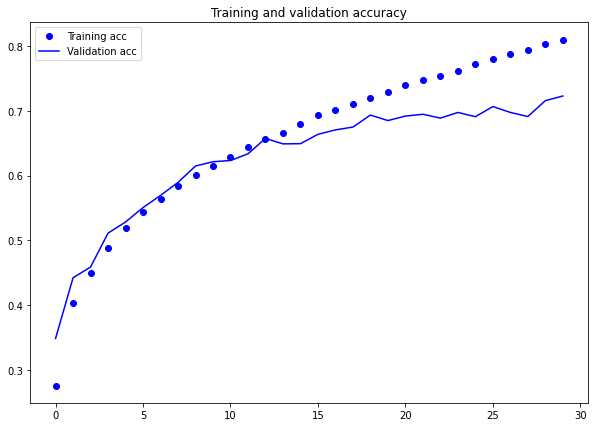

<Figure size 432x288 with 0 Axes>

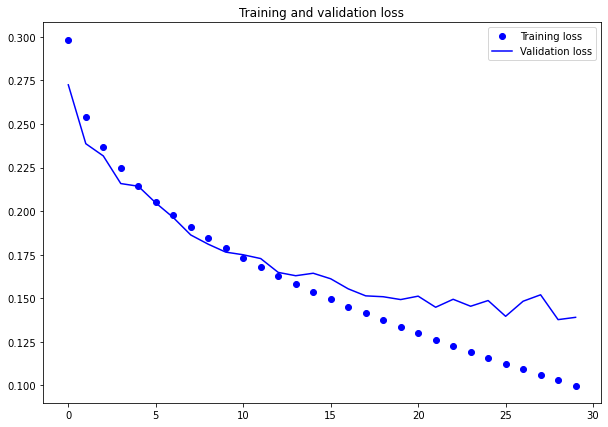

In [11]:
plt.figure(figsize=(10,7))

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()


plt.figure()
plt.figure(figsize=(10,7))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show();

In [12]:
results = model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.1424 - acc: 0.7167


In [13]:
print(f"The accuracy of the model is {round(results[1],2)*100}%")

The accuracy of the model is 72.0%


In [14]:
# Predicting test data

y_pred_test = model.predict(x_test)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

In [15]:
# reverse y_test from categorical 

y_test = np.argmax(y_test,axis=1)

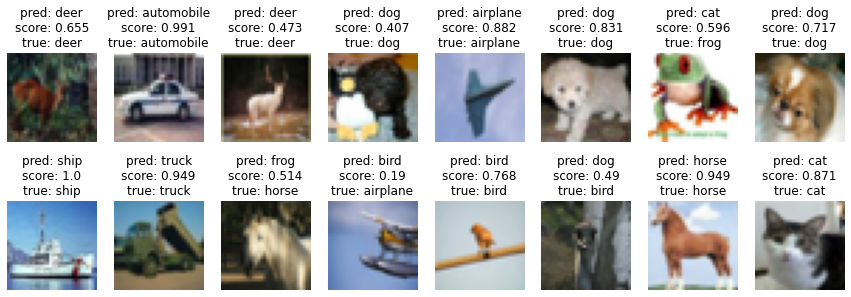

In [16]:
# display the predictions

cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_test[random_index, :])
        pred_label = cifar10_classes[y_pred_test_classes[random_index]]
        pred_proba = y_pred_test_max_probas[random_index]
        true_label = cifar10_classes[y_test[random_index]]
        ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(pred_label, pred_proba, true_label))
plt.show();